In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')
import cv2,os,math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,precision_recall_curve,roc_auc_score, roc_curve

In [3]:
link = ['C:/Users/ADMIN/Downloads/kagglecatsanddogs_5340/PetImages/Cat',"C:/Users/ADMIN/Downloads/kagglecatsanddogs_5340/PetImages/Dog"]

In [4]:
X_Cat1,X_Dog1=os.listdir(link[0]),os.listdir(link[1])
X_true = np.concatenate((X_Cat1, X_Dog1), axis=0)

In [5]:
y_Cat1,y_Dog1=os.listdir(link[0]),os.listdir(link[1])
y_Cat,y_Dog=[0]*len(y_Cat1),[1]*len(y_Dog1)
y_true = np.concatenate((y_Cat, y_Dog), axis=0)

In [6]:
X= []
y=[]
for i in range(len(X_true)):
    try:
        img = io.imread(os.path.join(link[0],X_true[i]))
        img = resize(img,(32,32),anti_aliasing=True)
        gray = rgb2gray(img)
        X.append(list(gray.flatten()))
        y.append(y_true[i])
    except:
        print("anh meo va cho bi loi",X_true[i])

anh meo va cho bi loi 10125.jpg
anh meo va cho bi loi 10404.jpg
anh meo va cho bi loi 10501.jpg
anh meo va cho bi loi 10820.jpg
anh meo va cho bi loi 11095.jpg
anh meo va cho bi loi 11210.jpg
anh meo va cho bi loi 11565.jpg
anh meo va cho bi loi 11874.jpg
anh meo va cho bi loi 11935.jpg
anh meo va cho bi loi 12080.jpg
anh meo va cho bi loi 140.jpg
anh meo va cho bi loi 2663.jpg
anh meo va cho bi loi 2939.jpg
anh meo va cho bi loi 3300.jpg
anh meo va cho bi loi 3491.jpg
anh meo va cho bi loi 4833.jpg
anh meo va cho bi loi 5370.jpg
anh meo va cho bi loi 5553.jpg
anh meo va cho bi loi 5686.jpg
anh meo va cho bi loi 6435.jpg
anh meo va cho bi loi 660.jpg
anh meo va cho bi loi 666.jpg
anh meo va cho bi loi 7276.jpg
anh meo va cho bi loi 7968.jpg
anh meo va cho bi loi 7978.jpg
anh meo va cho bi loi 8470.jpg
anh meo va cho bi loi 850.jpg
anh meo va cho bi loi 9171.jpg
anh meo va cho bi loi 936.jpg
anh meo va cho bi loi 9565.jpg
anh meo va cho bi loi 9778.jpg
anh meo va cho bi loi Thumbs.db
an

In [23]:
print(len(X),len(y))#kiem tra len X va len y
#dua X va y vao dang numpy_arrar(ma tran)
X=np.array(X)
y=np.array(y)
X=preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=15)

24938 24938


In [47]:
def confunction_matrix(y_test,y_hat):
    confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
    Accuracy = metrics.accuracy_score(y_test, y_hat)
    print('su dung ma tran hon hop de tinh ACcracy',Accuracy)
    Precision = metrics.precision_score(y_test,y_hat)
    print('su dung ma tran hon hop de tinh precision ',Precision)
    recall = metrics.recall_score(y_test, y_hat)
    print("su dung ma tran hon hop de tinh recall",recall)
    F1_score = metrics.f1_score(y_test,y_hat)
    print("su dung ma tran hon hop de tinh f1",F1_score)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [9]:
def scaledata(X,y):
    X=preprocessing.MinMaxScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=15)
    return X_train, X_test, y_train, y_test

In [10]:
def Y_du_doan_KNN(X_train, y_train,X_test):
    kNN = KNeighborsClassifier(n_neighbors=3)
    kNN.fit(X_train, y_train)
    y_hat_KNN = kNN.predict(X_test)
    return y_hat_KNN

In [11]:
def scores_KNN(y_test,y_hat_KNN):
    ac_KNN=accuracy_score(y_hat_KNN, y_test)
    print("Hiệu năng mô hình acc cua K lân cận",ac_KNN)
    ps_KNN=precision_score(y_test, y_hat_KNN,average='macro')
    print("Hiệu năng mô hình precision cua K lân cận",ps_KNN)
    rs_KNN =recall_score(y_test, y_hat_KNN, average='macro')
    print("Hiệu năng mô hình recall cua K lân cận",rs_KNN)
    f1_KNN= 2*(ps_KNN*rs_KNN)/(ps_KNN+rs_KNN)
    print("Hiệu năng mô hình f1 cua K lân cận",f1_KNN)
    return ac_KNN,ps_KNN,rs_KNN,f1_KNN

In [12]:
def y_du_doan_logistic(X_test,y_test):
    model = LogisticRegressionCV(cv=3, random_state=15).fit(X_test, y_test)
    y_hat = model.predict(X_test)
    return  y_hat

In [13]:
def scores(y_test,y_hat):
    ac=accuracy_score(y_hat, y_test)
    print('Hiệu năng mô hình acc cua logistic : ', ac)
    ps=precision_score(y_test, y_hat,average='macro')
    print("Hiệu năng mô hình precision cua logistic",ps)
    rs =recall_score(y_test, y_hat, average='macro')
    print("Hiệu năng mô hình recall cua logistic",rs)
    f1= 2*(ps*rs)/(ps+rs)
    print("Hiệu năng mô hình f1 cua logistic",f1)
    return ac,ps,rs,f1

In [14]:
from sklearn import metrics

In [15]:
def roc(X_train, y_train,X_test,y_test):
    #B3: Khởi tạo và huấn luyện mô hình
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)
    gnb_model = KNeighborsClassifier(n_neighbors=3)
    gnb_model.fit(X_train, y_train)
    #B4: Lấy xác suất dự đoán nhãn positive của mô hình
    lg_probs = lg_model.predict_proba(X_test)[:,1]
    gnb_probs = gnb_model.predict_proba(X_test)[:,1]
    #B5: Tính ROC score
    lg_auc = roc_auc_score(y_test, lg_probs)
    gnb_auc = roc_auc_score(y_test, gnb_probs)
    print('Mô hình Logistic Regression - ROC AUC: ', lg_auc)
    print('Mô hình Naive Bayes - ROC AUC: ', gnb_auc)
    #B6: Vẽ đường ROC
    lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
    gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
    plt.plot(lg_fpr, lg_tpr, marker ='.', label='Logistic')
    plt.plot(gnb_fpr, gnb_tpr, marker='3', label='K_NN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [16]:
def ps_and_rs(X_train, y_train,X_test,y_test):
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)
    gnb_model = KNeighborsClassifier(n_neighbors=3)
    gnb_model.fit(X_train, y_train)
    #B4: Lấy xác suất dự đoán của mô hình
    lg_probs = lg_model.predict_proba(X_test)
    gnb_probs = gnb_model.predict_proba(X_test)
    #Chỉ lấy xác suất dự đoán với nhãn positive
    lg_probs = lg_probs[:,1]
    gnb_probs = gnb_probs[:,1]
    #B5: Lấy nhãn lớp dự đoán và giá trị precision & recall tương ứng
    lg_pre, lg_rec, _ = precision_recall_curve(y_test, lg_probs)
    gnb_pre, gnb_rec, _ = precision_recall_curve(y_test, gnb_probs)
    no_model = len(y_test[y_test==1])/len(y_test)
    plt.plot([0,1], [no_model, no_model], linestyle = '--', label='No model')
    plt.plot(lg_rec, lg_pre, marker ='.', label='Logistic')
    plt.plot(gnb_rec, gnb_pre, marker='o', label='K_NN')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

Hiệu năng mô hình acc cua K lân cận 0.23563218390804597
Hiệu năng mô hình precision cua K lân cận 0.2355108313825714
Hiệu năng mô hình recall cua K lân cận 0.2359506555075363
Hiệu năng mô hình f1 cua K lân cận 0.2357305382901618


Hiệu năng mô hình acc cua logistic :  0.5152365677626303
Hiệu năng mô hình precision cua logistic 0.5216045563136259
Hiệu năng mô hình recall cua logistic 0.5080359776667767
Hiệu năng mô hình f1 cua logistic 0.514730863785675
Mô hình Logistic Regression - ROC AUC:  0.3635970218842744
Mô hình Naive Bayes - ROC AUC:  0.2206828554635492


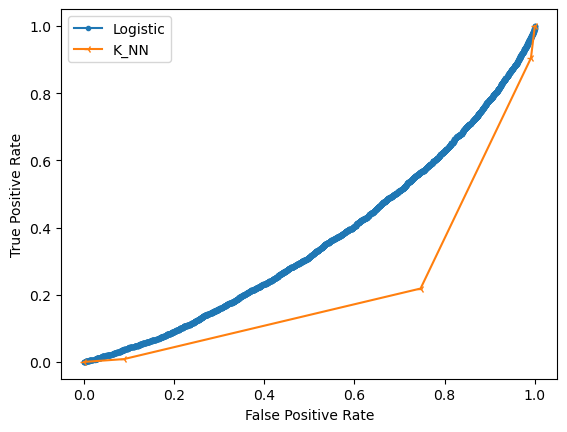

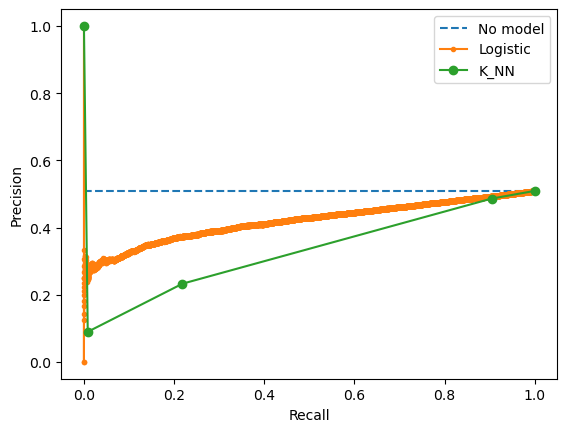

su dung ma tran hon hop de tinh ACcracy 0.5152365677626303
su dung ma tran hon hop de tinh precision  0.5135699373695198
su dung ma tran hon hop de tinh recall 0.9041743239695458
su dung ma tran hon hop de tinh f1 0.6550641940085592


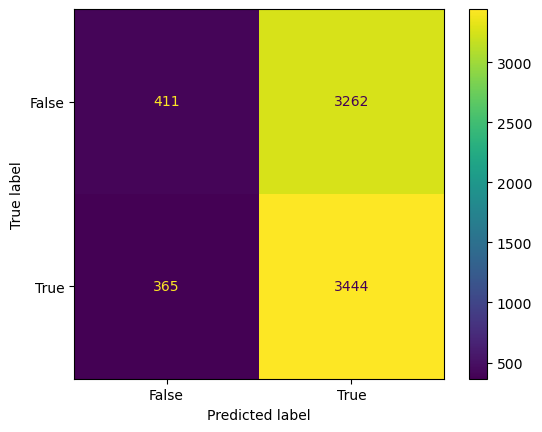

In [48]:
def main():
    X_train, X_test, y_train, y_test=scaledata(X,y)
    y_hat_KNN=Y_du_doan_KNN(X_train, y_train,X_test)
    scores_KNN(y_test,y_hat_KNN)
    y_hat= y_du_doan_logistic(X_test,y_test)
    print("\n")
    scores(y_test,y_hat)
    roc(X_train, y_train,X_test,y_test)
    ps_and_rs(X_train, y_train,X_test,y_test)
    confunction_matrix(y_test,y_hat)
if __name__=="__main__":
    main()